<a href="https://colab.research.google.com/github/CHRISTINEMUTHEE/Week-4-IP/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_07_Christine_Muthee_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ELECTRIC CAR USAGE DATA ANALYSIS.


**PROBLEM STATEMENT**

1.Transport services are faced with problems ranging from insufficient resources to march up the demand for transportation services,congestion of people and parking in cities and car ownership costs just to mention a few.

This analysis is fundermental in understanding the car service usage over time.

Knowledge of this will have the following impact:

*   We will understand the car pick up and returning times to enable us organize and reduce traffic in car demand while allocating sufficient resources to contribute to the company's market penetration.
*   We will see popular stations with the aim of assessing locations to facilitate resources while observing any variation in data behavior if a different car type is used. 



1.0 Importing our Libraries

In [ ]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import numpy as np

2.0 Reading the Dataset from our CSV file


In [ ]:
#Our Data set contains the csv file for the car usage over a period of 9 days.
# The link for this data set is as follows
# URL ='http://bit.ly/autolib_dataset'


In [ ]:
# URL ='http://bit.ly/autolib_dataset'
# E_car_df=pd.read_csv(URL)
# E_car_df.head() 

3.0 Loading and Previewing our dataset.

In [ ]:
#Defining a function to load our dataset and previewing the first 10 rows
def Our_dataframe(data):
  E_car_df=pd.read_csv(data)
  return E_car_df.head(10)
Our_dataframe('http://bit.ly/autolib_dataset')

4.0 Accessing Information about our dataset.
 * We might need to convert columns to the respective datatypes to enable aggregation and referencing in operation.


In [ ]:
E_car_df.info()

5.0 Cleaning Our Dataset.
Every necessary data cleaning detail will be put to consideration with factors ranging from.
*   Validity
*   Accuracy
*   Completeness
*   Consistency
*   Uniformity
*   Outliers 








5.1 Validity
*   Here i will ensure that my findings truly represent the phenomenon i claim to measure.


In [ ]:
E_car_df.info()

In [ ]:
# Procedure 1:Irrelevant Data Observation,'ID','Geo point','Public name'
# Data Cleaning Action:Dropping unnesessary attributes eg. Displayed Comment,ID,Geo point and Public name
# Explanation:The entries are not necessary for my data analysis objectives.
New_df=E_car_df.drop(columns=['Displayed comment','ID','Geo point','Public name'],axis=1)
New_df.head()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,STATION,75015,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,STATION,75014,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,STATION,93350,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,STATION,75013,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,PARKING,75017,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
New_df.shape

(5000, 21)

In [ ]:
# Procedure 2:Data Types restructuring
# Data Cleaning Action:Converting the Year,Month,day and Month to string to enable concatenation in a new column and there after converting to time stamp for analysis
# Explanation:To enable concatenation in a new column and there after converting to time stamp for analysis
New_df[['year','month','day','hour','minute']]=New_df[['year','month','day','hour','minute']].astype(str)
New_df['Timestamp']=New_df['year']+'-'+New_df['month']+'-'+New_df['day']+' '+New_df['hour']+':'+New_df['minute']
New_df['Timestamp']=pd.to_datetime(New_df['Timestamp'])
New_df.head()

In [ ]:
# Procedure 3:Renaming columns
# Data Cleaning Action:Gave lower case to all columns for readability
# Explanation:To enable reading and referencing column names while calling them.
New_df.columns=map(str.lower,New_df.columns)
New_df.head()


5.2 Accuracy

*   This is the measure of the correctness of my data.



In [ ]:
#Reviewing information about our dataset.
New_df.info()

In [ ]:
#Creating a new column with the sum of blue car,utilib car and utilib 1.4 car.
New_df[New_df.columns[2:5]]

In [ ]:
#Inserting a new column with the total sum of cars available in respective addreses.
New_df['Total_cars']=(New_df[New_df.columns[2:5]]).sum(axis=1)
New_df.head()

In [ ]:
# Confirming that charge slots can only be greater than one if the charging status is operational.
Charge_df=New_df[New_df.columns[5:7]]
Charge_df

5.3 Completeness
* This checks for null values in the dataset 




In [ ]:
New_df.isnull().any()

address                False
cars                   False
bluecar counter        False
utilib counter         False
utilib 1.4 counter     False
charge slots           False
charging status        False
city                   False
kind                   False
postal code            False
rental status          False
scheduled at            True
slots                  False
station type           False
status                 False
subscription status    False
year                   False
month                  False
day                    False
hour                   False
minute                 False
timestamp              False
Total_cars             False
dtype: bool

In [ ]:
# Checking for null values in the Dataset
# Scheduled at contains almost all null values thus not important to my analysis. 
# Dropping the column
Clean_df=New_df.drop(New_df.columns[11],axis=1)
Clean_df


In [ ]:
#Confirming operation.
Clean_df.isnull().any()

5.4 Consistency


*   Here im ensuring that my data is the same for all instances of this application/Context in time.
*   Getting rid of duplicates and any inconsistencies



In [ ]:
#Observing which observations are duplicates
Clean_df.duplicated
#Dropping Duplicates in my data
Clean_df.drop_duplicates()

5.5 Uniformity

In [ ]:
# Had Converted column types to lower in Operation 5.1 ,Proceedure 3
# I am confifident that my data is clean and i have all i need for analysis. 
Clean_df.shape

(5000, 22)

In [ ]:
Clean_df.info()

In [ ]:
#Converting column naming to a uniform format
Clean_df= Clean_df.rename(columns={'utilib counter':'utilib_counter',
                             'utilib 1.4 counter':'utilib_counter',
                             'charge slots':'charge_slots',
                             'charging status ':'charging_status ',
                             'postal code':'postal_code',
                             'rental status':'rental_status',
                             'station type':'station_type',
                             'subscription status':'subscription_status'})
Clean_df

5.6 Outliers

*   I will check for an observation that lies at an abnormal distance from other values in the following dataset.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


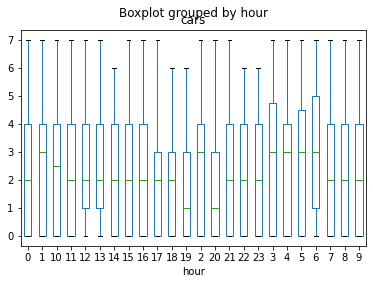

In [ ]:
# Boxplotting to check for any ouliers in numerical columns
import matplotlib.pyplot as plt 
% matplotlib inline 
Clean_df.boxplot(column='cars',by='hour',grid=False)
#Plotting a box plot based on time stamps prooved to be difficult due to the complexity of the dataset.

In [ ]:
Clean_df.head(2)

,address,cars,bluecar counter,utilib_counter,utilib_counter,charge_slots,charging status,city,kind,postal_code,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,timestamp,Total_cars
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,STATION,75015,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00,0
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,STATION,75014,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00,6


In [ ]:
#Identifying outliers and eliminating them.
# Using the Inter Quartile Rule where  any number below 1.5 times the 1st Quartile and any number 1.5 times above the 3rd quartile is considered a suspected outlier.
# The range is defined as follows:Q1-1.5*IQR  and Q3+1.5*IQR
def Outliers(Our_dataframe):
  Q1=Our_dataframe.quantile(0.25)
  Q3=Our_dataframe.quantile(0.75)
  IQR=Q3-Q1
  #This is the data frame without the outliers that fall outside the range
  Clean_df_Outliers=Our_dataframe[~((Our_dataframe<Q1-1.5*IQR)|(Our_dataframe>Q3+1.5*IQR)).any(axis=1)]
  print(Clean_df_Outliers.shape)
  print(Clean_df.shape)
  print(Our_dataframe.shape)
  print(Clean_df_Outliers)
  #Checking for outliers
Outliers(Clean_df.select_dtypes(int))
# There are outliers detected in the agregatable data types thuough would be considered as minimum since postal code is constant and has random digits.
# Othervalues on the other hand from the description woulnt be considered as outliers because they range between approximately 0-7.
#Number of outliers 



Exporting our dataframe:


In [ ]:
Clean_df.to_csv(r'C:\Users\LENOVO\Downloads\'Clean_Autolib.csv', index = False, header=True)
Clean_df

DATA ANALYSIS.

I will answer the questions stated in my objectives.


In [ ]:
Clean_df.head(6)